## Experimenting with Sentiment Analysis (to be continued)

In [65]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

#The data
corpus_root = 'books/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
df15 = pd.read_csv("../Downloads/df15.csv")
df20 = pd.read_csv("../Downloads/df20.csv")

In [67]:
words = ['lesbian', 'gay', 'homosexual', 'gender', 'bisexual', 'sexuality', 'same sex',
         'asexual', 'biphobia', 'bisexual', 'coming out', 'coming-out', 'gender identity',
        'queer', 'genderqueer', 'gender-queer', 'homophobia', 'LGBTQ', 'LGBT', 'LGBTQ+', 'LGBTQIA',
        'lgbtq', 'lgbt', 'lgbtq+', 'lgbtqia', 'non binary', 'non-binary', 'transgender'] 

In [68]:
# a lot of quotes with "bi" and "ally" aren't relevant so remove the rows that include these and don't include other relevant words 

df15 = df15[~(df15.quotation.str.contains("bi") & ~df15.quotation.isin(words))]
df15 = df15[~(df15.quotation.str.contains("ally") & ~df15.quotation.isin(words))]

df20 = df20[~(df20.quotation.str.contains("bi") & ~df20.quotation.isin(words))]
df20 = df20[~(df20.quotation.str.contains("ally") & ~df20.quotation.isin(words))]

In [69]:
quotes15 = df15.quotation
quotes20 = df20.quotation

In [71]:
quote_string15 = '. '.join(quotes15)
quote_string15[0:500]

"discrimination based upon a person's sexual orientation or gender identity an unlawful discriminatory practice.. if advocating for equal pay for equal work is playing the gender card, deal me in. I am ready to play as hard as I can.. In an age where each install can cost several dollars in acquisition spend, experimenting with the use of gender signals might seem like a risky strategy. However, broadening the appeal of your game to both genders could pay dividends for publishers and developers i"

In [72]:
quote_string20 = '. '.join(quotes20)
quote_string20[0:500]

"We can close the gender gap in hockey with the right partnerships and strategies, and this NHLCA Female Coaches Development Program is advancing equity in a way that will produce dividends for the sport long term.. That just doesn't cut it... The Mayor has to stand on his record. And what we need to know is exactly what's lurking out there. He has gotten some number of women -- dozens, who knows -- to sign nondisclosure agreements both for sexual harassment and for gender discrimination in the w"

In [74]:
nlp = spacy.load('en_core_web_sm')

In [47]:
# Looking at a single quote
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(quote1)

In [76]:
quote1 = quotes15[70]

In [77]:
print(quote1, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

if advocating for equal pay for equal work is playing the gender card, deal me in. I am ready to play as hard as I can. 

Negative sentiment: 0.092
Neutral sentiment: 0.689
Positive sentiment: 0.22
Compound sentiment: 0.5994


In [78]:
doc15 = nlp(quote_string15)
doc20 = nlp(quote_string20)

In [ ]:
#nlp.add_pipe(nlp.create_pipe('sentencizer'))

### 2015 Quotes

Text(0, 0.5, 'Number of sentences')

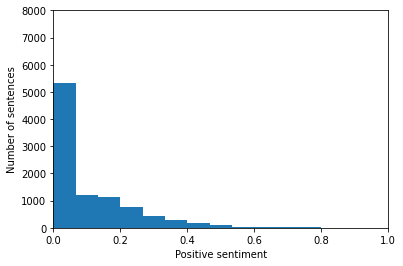

In [79]:
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc15.sents]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

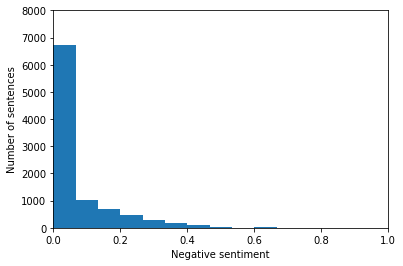

In [80]:
negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for sent in doc15.sents]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

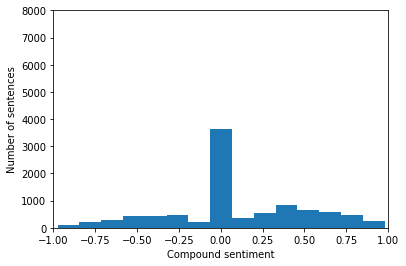

In [81]:
total_sent = []
[total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for sent in doc15.sents]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.ylim([0,8000])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

In [83]:
sents = [analyzer.polarity_scores(sent.text)['compound'] for sent in doc15.sents]
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

Number of positive sentences: 3744
Number of negative sentences: 2230
Number of neutral sentences: 3549


### 2020 Quotes

Text(0, 0.5, 'Number of sentences')

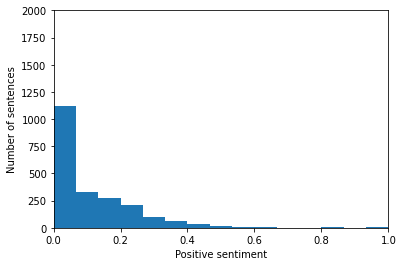

In [84]:
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc20.sents]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,2000])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

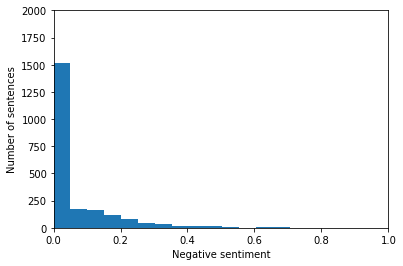

In [85]:
negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for sent in doc20.sents]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,2000])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

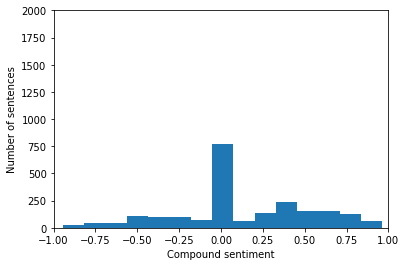

In [86]:
total_sent = []
[total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for sent in doc20.sents]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.ylim([0,2000])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')